# Problema de optimización usando Algoritmos Genéticos
<a href="https://colab.research.google.com/github/milocortes/mod_04_concentracion/blob/main/src/talleres_clase/prob_opt_algo_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Función Himmelblau

* Función: $f(x,y) = (x^2 +y -11)^2 + (x+y^2-7)^2$
* NO Var: 2
* Precisión: 6
* Espacio de búsqueda : $-5<x,y < 5$, $-∞ < z < 1000$

# Parámetros del algoritmo

* Método de selección: ruleta
* Cruza: En un punto
* Mutación: en un bit
* Número de generación: 30
* Tamaño de la población (número de individuos): 50
* Probabilidad de cruza: $P_c = 0.85$
* Probabilidad de mutación : 0.000000001

## Generación de la población

### Codificación de las variables

$$
L = [\log_2((l_{sup} - l_{inf})\times 10^{\text{precision}})]
$$


In [1]:
from math import log2, ceil


def length_variable(l_sup: int, l_inf: int , precision: int):
    """
    Nombre de la función : length_variable
    
    Descripción: Función que obtiene la cantidad de bits para representar la variable
    
    argumentos:
        * l_sup: límite superior de la función
    """
    return ceil(log2((l_sup - l_inf)*10**precision))

x_l_sup = 5
y_l_sup = 5

x_l_inf = -5
y_l_inf = -5

precision = 6

L_x = length_variable(x_l_sup, x_l_inf, precision)
L_y = length_variable(y_l_sup, y_l_inf, precision)
L_x, L_y

(24, 24)

In [2]:
# Función que genera poblacipob aleatori de m individuos de tamaño L
import random

m = 30 

def rand_population_binary(m,L):
    return [[random.randint(0,1)  for i in range(L)] for j in range(m)]

rand_population_binary(m,L_x)[0]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]

In [3]:
rand_population_binary(m,L_y)[0]

[1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]

In [4]:
# GENERAMOS LA POBLACIÓN INICIAL

import numpy as np

n_variables = 2
l_sup_vec = [x_l_sup, y_l_sup]
l_inf_vec = [x_l_inf, y_l_inf]

dimension_vec = []
genotipo = []
L_cromosoma = 0

# Generamos la poblacion inicial

for i in range(n_variables):
    L_var = length_variable(l_sup_vec[i], l_inf_vec[i], precision)
    L_cromosoma +=  L_var
    
    dimension_vec.append(L_var)
    genotipo.append(rand_population_binary(m, L_var))

genotipo

[[[0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0],
  [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1],
  [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
  [0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
  [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1],
  [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
  [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
  [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1],
  [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
  [1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
  [0, 0, 0, 

# Evaluación de población inicial

In [5]:
# Función que obtiene las potencias base 2 de un vector de bits (un individui)

def to_decimal(dimension,individuo):
    return sum([2**(i) for i in range(dimension-1,-1,-1) ]* np.array(individuo))

In [6]:
dimension = 24
individuo_inicial = genotipo[0][4]

to_decimal(dimension, individuo_inicial)

15336543

In [7]:
## la variable j representa cada bit de un individuo (secuencia de bits)
[(2**i)*j for i,j in zip(range(4-1,-1,-1),[1,0,1,0])]

[8, 0, 2, 0]

In [8]:
[2**i for i in range(4-1, -1,-1)] * np.array([1,0,1,0])

array([8, 0, 2, 0])

In [9]:
# Función que decodifica el vector a un valor real

def binary2real(i_sup, i_inf, dimension, individuo):
    return i_inf+ (to_decimal(dimension, individuo)* ((i_sup-i_inf)/(2**len(individuo)-1)))

In [10]:
for i in genotipo[1]:
    print(binary2real(5, -5, 24, i))

-2.468161432037439
-0.3349909386033376
4.143781610952711
-4.796990740119859
-0.009537041755738329
-1.2310955662188272
-4.4377857111564705
4.732571824346293
-0.9419033492745967
-1.5068683926384683
3.8229506506294406
1.7397193157505582
0.10302216428650368
1.3368193111908022
-2.6859520486564663
1.5541152092287067
4.081669395069444
3.3056985322057333
-3.3180569599900815
-0.05844384780191447
-0.35007329881628113
-4.191749047741237
2.482670395533466
2.3099218195630202
4.427400793278265
0.003938377138279492
3.2168274055020447
-3.5706763607666705
3.1814425099755823
1.9248191669475538


In [11]:
def binary2real(i_sup, i_inf, dimension, poblacion):
    return [i_inf+ (to_decimal(dimension, individuo)* ((i_sup-i_inf)/(2**len(individuo)-1))) for individuo in poblacion]

In [12]:
binary2real(5, -5, 24,genotipo[0])

[-4.31334253033057,
 -4.781045900645608,
 -2.424443806674707,
 1.2074825887371654,
 4.14129252083853,
 -1.746442124035485,
 4.0041356685242455,
 0.251965239761188,
 -0.8368781707810262,
 4.504256218925489,
 1.6597793495523545,
 -4.754112348205587,
 4.254805401254023,
 -3.8294719952030176,
 3.591818129528649,
 -4.734430297281164,
 4.4873243264749245,
 -4.503108829445173,
 2.2354625007785858,
 -1.802425789977657,
 -3.569894943827089,
 2.3975710509759818,
 0.7810327876229755,
 -1.9907156819531728,
 -1.1854157558331342,
 2.7350549539956424,
 -1.6634605326330978,
 2.1597443318214617,
 -2.8466998247325317,
 -2.1369920454616573]

In [13]:
# Generamos la lista que contiene el fenotipo, es decir, realizamos la decodificación
## Bits ---> reales

feno = [[] for i in range(m)]

for i in range(n_variables):
  # Obtenemos los limites para cada variable
  i_sup = l_sup_vec[i]
  i_inf = l_inf_vec[i]

  pob = genotipo[i]

  dim = dimension_vec[i]

  b2r = binary2real(i_sup, i_inf, dim, pob)
  
  for j in range(m):
    feno[j].append(b2r[j])

In [14]:
feno

[[-4.31334253033057, -2.468161432037439],
 [-4.781045900645608, -0.3349909386033376],
 [-2.424443806674707, 4.143781610952711],
 [1.2074825887371654, -4.796990740119859],
 [4.14129252083853, -0.009537041755738329],
 [-1.746442124035485, -1.2310955662188272],
 [4.0041356685242455, -4.4377857111564705],
 [0.251965239761188, 4.732571824346293],
 [-0.8368781707810262, -0.9419033492745967],
 [4.504256218925489, -1.5068683926384683],
 [1.6597793495523545, 3.8229506506294406],
 [-4.754112348205587, 1.7397193157505582],
 [4.254805401254023, 0.10302216428650368],
 [-3.8294719952030176, 1.3368193111908022],
 [3.591818129528649, -2.6859520486564663],
 [-4.734430297281164, 1.5541152092287067],
 [4.4873243264749245, 4.081669395069444],
 [-4.503108829445173, 3.3056985322057333],
 [2.2354625007785858, -3.3180569599900815],
 [-1.802425789977657, -0.05844384780191447],
 [-3.569894943827089, -0.35007329881628113],
 [2.3975710509759818, -4.191749047741237],
 [0.7810327876229755, 2.482670395533466],
 [-1.

In [15]:
def f_himmelblau(X):
  x,y = X
  return (x**2 + y -11)**2 + (x + y**2 -7)**2

In [19]:
objv = [f_himmelblau(f) for f in feno]
objv

[53.650616070268285,
 268.950477081088,
 60.96503951185625,
 502.086528804006,
 45.880704112254236,
 136.57654379758142,
 279.1802004518928,
 283.38639425235465,
 174.67046080983295,
 60.60171885464311,
 105.57632802205708,
 254.1594451444933,
 59.41000707214678,
 106.781500361511,
 15.102730107632471,
 255.04021859605314,
 374.8563831850923,
 158.6803563429541,
 125.87622988419552,
 138.41407290898618,
 111.09043850606372,
 257.35545558683293,
 62.52872803267076,
 35.704606900901766,
 157.0375111477401,
 30.548617458497823,
 27.998575780367506,
 160.69219672260556,
 0.1568633454535085,
 49.83339463444822]

## Selección

En la selección vamos a escoger a los individuos con las mejores condiciones para contribuir a la generación de la siguiente generación.

Para esto, tenemos que calcular la aptitud de cada individuo.

### Aptitud

In [21]:
## Generación de la aptitud con normalización
## Como estamos en un problema de minimización, para obtener la aptitud de los valores de la función objetivo,
## la propuesta es usar la inversa de estos valores, pues la inversa de un valor muy pequeño, es superior a la inversa de un
## valor grande, de manera que en el primer caso, la aptitud será mayor
val_min = min(objv)
val_max = max(objv)

objv_norm = [ (((i-val_min)/(val_max-val_min))+0.0001)**-1 for i in objv]

for i,j in zip(objv, objv_norm):
  print(f"{i}--> {j}")

53.650616070268285--> 9.374162829758347
268.950477081088--> 1.866993596079302
60.96503951185625--> 8.247504371371805
502.086528804006--> 0.9999000099990001
45.880704112254236--> 10.965379812985425
136.57654379758142--> 3.6779521581198393
279.1802004518928--> 1.7985570517106533
283.38639425235465--> 1.7718517181370372
174.67046080983295--> 2.875336656127237
60.60171885464311--> 8.297037164287524
105.57632802205708--> 4.758995873076623
254.1594451444933--> 1.9756905466656784
59.41000707214678--> 8.463767697505878
106.781500361511--> 4.705230517268298
15.102730107632471--> 33.47076995813178
255.04021859605314--> 1.9688647059939808
374.8563831850923--> 1.339373049014566
158.6803563429541--> 3.1652771543215272
125.87622988419552--> 3.9908676426385137
138.41407290898618--> 3.6290874984033827
111.09043850606372--> 4.522550224493034
257.35545558683293--> 1.9511449395294913
62.52872803267076--> 8.040902275964843
35.704606900901766--> 14.099965180522085
157.0375111477401--> 3.198413154479442
30.

In [28]:
## Generacion de aptitud escalada

def scaled_fitness(new_max, new_min, original_fitness):
  val_max = max(original_fitness)
  val_min = min(original_fitness)

  y = np.array([new_min, new_max])
  X = np.matrix([[val_min, 1],[1, val_max]])

  a,b = np.ravel(X.I @ y)

  return [b*i + a for i in original_fitness]

scaled_fitness(100,50, objv_norm)

[50.04687031456754,
 50.00933446802375,
 50.04123702221927,
 50.00499900004999,
 50.05482639956325,
 50.01838926092451,
 50.00899228529848,
 50.00885875862928,
 50.01437618337441,
 50.04148468618632,
 50.02379447955335,
 50.00987795278212,
 50.04231833886075,
 50.02352565277162,
 50.167353351414356,
 50.009843823578414,
 50.006696365262044,
 50.01582588587988,
 50.01995383836275,
 50.01814493762348,
 50.02261225129861,
 50.009755224745206,
 50.0402040117319,
 50.07049932655767,
 50.015991565882324,
 50.08243996756628,
 50.08997715892558,
 50.015627610462396,
 100.00000000000001,
 50.050468305003285]

In [37]:
# Identificamos cuales son los individuos con el mejor fitness
suma = sum(objv_norm)
objv_norm = [i/suma  for i in objv_norm]
aptitud = sorted(enumerate(objv_norm),key = lambda tup: tup[1], reverse=True)


In [38]:
aptitud

[(28, 0.9806941930081374),
 (14, 0.0032824589733451057),
 (26, 0.0017648113355065223),
 (25, 0.001616977741032018),
 (23, 0.0013827753974154943),
 (4, 0.0010753684306723463),
 (29, 0.0009898892709766097),
 (0, 0.0009193187051456741),
 (12, 0.0008300367831913869),
 (9, 0.0008136856166189478),
 (2, 0.0008088279643813558),
 (22, 0.0007885666168584637),
 (10, 0.00046671196172759353),
 (13, 0.0004614392245049694),
 (20, 0.0004435238742747967),
 (18, 0.0003913820722199665),
 (5, 0.00036069463236298733),
 (19, 0.00035590250356026256),
 (24, 0.0003136665207438828),
 (17, 0.0003104168924504444),
 (27, 0.00030652794147848004),
 (8, 0.0002819825961607417),
 (11, 0.00019375482462961034),
 (15, 0.00019308541839869708),
 (21, 0.00019134765119137857),
 (1, 0.00018309497780583515),
 (6, 0.0001763834456406474),
 (7, 0.00017376446908484836),
 (16, 0.00013135153714401884),
 (3, 9.80596133394798e-05)]

In [64]:
from ast import Index
# Selección por el método de la ruleta

n = int(m/2)
suma_acumulada = np.cumsum([ v for k,v in aptitud])

individuos_dict = {i:{} for i in range(n)}

for pareja in range(n):
  for individuo in range(2):
    aleatorio = random.random()
    index_ind = np.where(suma_acumulada >= aleatorio)[0][0]
    cromosoma = []

    for var in range(n_variables):
      cromosoma.extend(genotipo[var][aptitud[index_ind][0]])
    individuos_dict[pareja][individuo]=cromosoma


{0: {0: [0,
   0,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   0,
   0,
   1,
   1,
   0],
  1: [0,
   0,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   0,
   0,
   1,
   1,
   0]},
 1: {0: [0,
   0,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   0,
   0,
   1,
   1,
   0],
  1: [0,
   0,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,


## Cruza
* Es un proceso que genera una recombinación de los alelos mediante el intercambio de segmentos entre pares de cromosomas.
* Es usado para combinar la información genética de dos individuos para genear (usualmente) dos nuevos individuos.

## Cruza en un punto


In [96]:
# Escogemos de forma aleatoria un punto de cruza
punto_cruza = random.randint(0,L_cromosoma)



9

In [104]:
# Tomemos la pareja 0 y realizamos la cruza para generar dos individuos nuevos
primer_nuevo_individuo = individuos_dict[0][0][:punto_cruza] + individuos_dict[0][1][punto_cruza:]
segundo_nuevo_individuo = individuos_dict[0][1][:punto_cruza] + individuos_dict[0][0][punto_cruza:]
len(primer_nuevo_individuo),len(segundo_nuevo_individuo)

(48, 48)

### Generamos la nueva población a partir de la cruza de todas las parejas

In [107]:
nueva_poblacion = []
for pareja in range(n):
  punto_cruza = random.randint(0, L_cromosoma)
  primer_nuevo_individuo = individuos_dict[0][0][:punto_cruza] + individuos_dict[0][1][punto_cruza:]
  segundo_nuevo_individuo = individuos_dict[0][1][:punto_cruza] + individuos_dict[0][0][punto_cruza:]

  nueva_poblacion.append(primer_nuevo_individuo)
  nueva_poblacion.append(segundo_nuevo_individuo)

nueva_poblacion

[[0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0],
 [0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0],
 [0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0],
 [0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0],
 [0,
  0,
  1,
  1,
  0,
  1,
  1,
 

## Mutación 
* La mutación es el último operador genético en el proceso de generar la nueva población.
* La mutación es un proceso donde un alelo (bit) de cromosoma es reemplazado de forma aleatoria para generar un nuevo cromosoma.

In [119]:
mutacion_param = (1/L_cromosoma)

for index_ind, ind in enumerate(nueva_poblacion):
  aleatorio = random.random()
  if aleatorio < mutacion_param:
    print("muta")
    punto_mutacion = random.randint(0,L_cromosoma)
    nueva_poblacion[index_ind][punto_mutacion] = int(not nueva_poblacion[index_ind][punto_mutacion])

muta


# Ajustamos la nueva población al formato que hemos estado usando

In [122]:
inicio = 0
fin = 0
nueva_poblacion_format = []

for var in range(n_variables):
  nueva_poblacion_var = []
  fin += dimension_vec[var]
  for individuo in nueva_poblacion:
    nueva_poblacion_var.append(individuo[inicio:fin])

  nueva_poblacion_format.append(nueva_poblacion_var)
  inicio += fin

# Evaluación de la nueva población
## Decodificar la nueva población para obtener su fenotipo

In [128]:
# Generamos la lista que contiene el fenotipo, es decir, realizamos la decodificación
## Bits ---> reales

feno = [[] for i in range(m)]

for i in range(n_variables):
  # Obtenemos los limites para cada variable
  i_sup = l_sup_vec[i]
  i_inf = l_inf_vec[i]

  pob = nueva_poblacion_format[i]

  dim = dimension_vec[i]

  b2r = binary2real(i_sup, i_inf, dim, pob)
  
  for j in range(m):
    feno[j].append(b2r[j])
feno

[[-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425099755823],
 [-2.8466998247325317, 3.1814425

In [129]:
objv = [f_himmelblau(i) for i in feno]
objv

[0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.16020637389491443,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085,
 0.1568633454535085]

## TODO EST FUE PARA UNA SOLA GENERACIÓN ...

Para ejecutar el algoritmo más generaciones, construyamos las funciones:

* APTITUD
* SELECCION
* CRUZA
* MUTACION
* DECODE
* OBJFUN

In [134]:
# Función que genera la estructura de datos Fenotipo
def DECODE(n_variables,m,i_sup_vec,i_inf_vec,dimension_vec,pob_vec):

    feno = [[] for i in range(m)]

    for i in range(n_variables):
        i_sup = i_sup_vec[i]
        i_inf = i_inf_vec[i]
        pob = pob_vec[i]
        dim = dimension_vec[i]
        b2r = binary2real(i_sup,i_inf,dim,pob)
        for k in range(m):
            feno[k].append(b2r[k])

    return feno

# Funcion que genera la estructura de datos de la función objetivo
def OBJFUN(f,feno):
    return [f(i) for i in feno]

# Función que genera la aptitud de los individuos
def APTITUD(objv):

    val_max = max(objv)
    val_min = min(objv)


    objv_norm = [(((i-val_min)/(val_max-val_min))+0.01)**-1 for i in objv]
    suma = sum(objv_norm)
    key_objv = [(k,i/suma) for (k,i) in enumerate(objv_norm)]
    objv_sort = sorted(key_objv,key=lambda tup: tup[1],reverse=True)

    return objv_sort

# Función que selecciona a los mejores individuos
def SELECCION(aptitud,n_variables,población):
    n = int(len(aptitud)/2)
    suma_acumulada = np.cumsum([v for (k,v) in aptitud])

    individuos_dict = {i:{} for i in range(n)}

    for pareja in range(n):
        for individuo in range(2):
            aleatorio = random.random()
            index_ind = np.where(suma_acumulada >= aleatorio)[0][0]
            cromosoma = []
            for gen in range(n_variables):
                cromosoma.extend(población[gen][aptitud[index_ind][0]])
            individuos_dict[pareja][individuo] = cromosoma

    return individuos_dict

def CRUZA(seleccion,length_total_cromosoma):
    n = len(seleccion)

    nueva_poblacion = []

    for pareja in range(n):
        punto_cruza = random.randint(0, length_total_cromosoma)

        primer_nuevo_individuo = seleccion[pareja][0][0:punto_cruza] + seleccion[pareja][1][punto_cruza:length_total_cromosoma]
        segundo_nuevo_individuo = seleccion[pareja][1][0:punto_cruza] + seleccion[pareja][0][punto_cruza:length_total_cromosoma]

        nueva_poblacion.append(primer_nuevo_individuo)
        nueva_poblacion.append(segundo_nuevo_individuo)

    return nueva_poblacion

def MUTACION(nueva_poblacion,length_total_cromosoma,n_variables,dimension_vec):

    mutacion_param = 2/length_total_cromosoma
    n = len(nueva_poblacion)
    
    """
    for individuo in range(n):
         muta_random = np.array([random.random() for i in range(length_total_cromosoma)])
         muta_index = np.where(muta_random < mutacion_param)[0]

         for i in muta_index:
             nueva_poblacion[individuo][i] = int(not nueva_poblacion[individuo][i])
    """
    for ind_index, ind in enumerate(nueva_poblacion):
        if random.random() < mutacion_param:
            punto_cruza = random.randint(0, L_cromosoma-1)
            nueva_poblacion[ind_index][punto_cruza] = int(not nueva_poblacion[ind_index][punto_cruza])
            
    inicio = 0
    fin = 0
    nueva_poblacion_format = []

    for gen in range(n_variables):
        nueva_poblacion_gen = []
        fin += dimension_vec[gen]
        for individuo in nueva_poblacion:
            nueva_poblacion_gen.append(individuo[inicio:fin])

        nueva_poblacion_format.append(nueva_poblacion_gen)
        inicio +=dimension_vec[gen]

    return nueva_poblacion_format

## Ejecutemos el algoritmo para varias generaciones

In [154]:
# Parámetros del algoritmo

m = 1000
n_variables = 2
i_sup_vec = [5, 5]
i_inf_vec = [-5, -5]
precision = 10
generaciones = 200

dimension_vec = []
genotipo = []
length_total_cromosoma = 0

# Generamos la poblacion inicial
for i in range(n_variables):
    length_cromosoma_var = length_variable(l_sup_vec[i], l_inf_vec[i], precision)
    length_total_cromosoma +=  length_cromosoma_var
    
    dimension_vec.append(length_cromosoma_var)
    genotipo.append(rand_population_binary(m, length_cromosoma_var))

# Iniciamos el ciclo evolutivo
print("Evaluación de la población inicial")
feno = DECODE(n_variables, m, i_sup_vec, i_inf_vec, dimension_vec, genotipo)
objv = OBJFUN(f_himmelblau, feno)

resultados = []
mejor_individuo = 0
mejor_valor = 100000000000000
fitness_values = []

for it in range(generaciones):
  print("-----------------------------")
  print("-%%%%%%%%%%%%%%%%%%%%%%%%%%%-")
  print("        Generacón {}".format(it))
  print("-%%%%%%%%%%%%%%%%%%%%%%%%%%%-")
  print("-----------------------------")

  aptitud =  APTITUD(objv)
  seleccion = SELECCION(aptitud, n_variables, genotipo)
  genotipo = CRUZA(seleccion, length_total_cromosoma)
  genotipo = MUTACION(genotipo, length_total_cromosoma, n_variables, dimension_vec)
  feno = DECODE(n_variables, m, i_sup_vec, i_inf_vec, dimension_vec, genotipo)
  objv = OBJFUN(f_himmelblau, feno)
  resultados.append(min(objv))
  mejor_individuo = objv.index(min(objv))

  if objv[mejor_individuo] < mejor_valor:
    mejor_valor = objv[mejor_individuo] 
    mejor_vector = feno[mejor_individuo]
  
  fitness_values.append(mejor_valor)


Evaluación de la población inicial
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 1
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 2
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 3
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 4
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 5
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 6
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
---------------

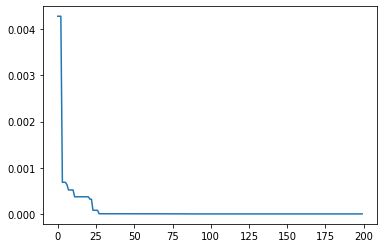

In [155]:
import matplotlib.pyplot as plt

plt.plot(fitness_values)
plt.show()

In [156]:
mejor_valor

3.999698199909678e-06

In [157]:
f_himmelblau(mejor_vector)

3.999698199909678e-06

In [158]:
mejor_vector

[3.0000209965364775, 1.999503369785085]